# ==========  PROJECT SETUP ==========

## Importing Libraries and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv(r'/content/WHO-COVID-19-global-daily-data.csv')


# ==========  DATA UNDERSTANDING ==========

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (489360, 8)


In [ ]:
df.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0
5,2020-01-04,CA,Canada,AMR,NaN,0,NaN,0
6,2020-01-04,CO,Colombia,AMR,NaN,0,NaN,0
7,2020-01-04,KM,Comoros,AFR,NaN,0,NaN,0
8,2020-01-04,CK,Cook Islands,WPR,0.0,0,0.0,0
9,2020-01-04,CW,Cura�ao,AMR,NaN,0,NaN,0


In [ ]:
df = df.sort_values(['WHO_region', 'Country', 'Date_reported']).reset_index(drop=True)


In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,DZ,Algeria,AFR,NaN,0,NaN,0
1,2020-01-05,DZ,Algeria,AFR,NaN,0,NaN,0
2,2020-01-06,DZ,Algeria,AFR,NaN,0,NaN,0
3,2020-01-07,DZ,Algeria,AFR,NaN,0,NaN,0
4,2020-01-08,DZ,Algeria,AFR,NaN,0,NaN,0


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      489360 non-null  object 
 1   Country_code       487321 non-null  object 
 2   Country            489360 non-null  object 
 3   WHO_region         489360 non-null  object 
 4   New_cases          210338 non-null  float64
 5   Cumulative_cases   489360 non-null  int64  
 6   New_deaths         153975 non-null  float64
 7   Cumulative_deaths  489360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 29.9+ MB


In [ ]:
df.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,489360,487321,489360,489360,2.103380e+05,4.893600e+05,153975.000000,4.893600e+05
unique,2039,239,240,7,NaN,NaN,NaN,NaN
top,2025-08-03,DZ,Algeria,EUR,NaN,NaN,NaN,NaN
freq,240,2039,2039,126418,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.701063e+03,2.044598e+06,46.109537,2.167556e+04
std,NaN,NaN,NaN,NaN,4.856463e+04,8.522921e+06,242.358188,8.681120e+04
min,NaN,NaN,NaN,NaN,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,3.000000e+00,6.602000e+03,0.000000,4.000000e+01
50%,NaN,NaN,NaN,NaN,6.100000e+01,5.950200e+04,2.000000,6.900000e+02
75%,NaN,NaN,NaN,NaN,6.770000e+02,6.609370e+05,15.000000,7.942000e+03


## ydata-profiling

In [ ]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="WHO COVID-19 Global Daily Data Report", explorative=True)
#profile.to_file("WHO_COVID19_Global_Daily_Data_Report.html")

> # Initial Data findings
> - The dataset contains daily records of COVID-19 cases and deaths for various countries.
> - There are missing values in the 'New_cases' and 'New_deaths' columns.
> - The 'Date' column is in string format and needs to be converted to datetime.            


# ==========  DATA CLEANING ==========

## Missing Values Analysis

In [ ]:
df.isnull().sum()

,0
Date_reported,0
Country_code,2039
Country,0
WHO_region,0
New_cases,279022
Cumulative_cases,0
New_deaths,335385
Cumulative_deaths,0


<Axes: >

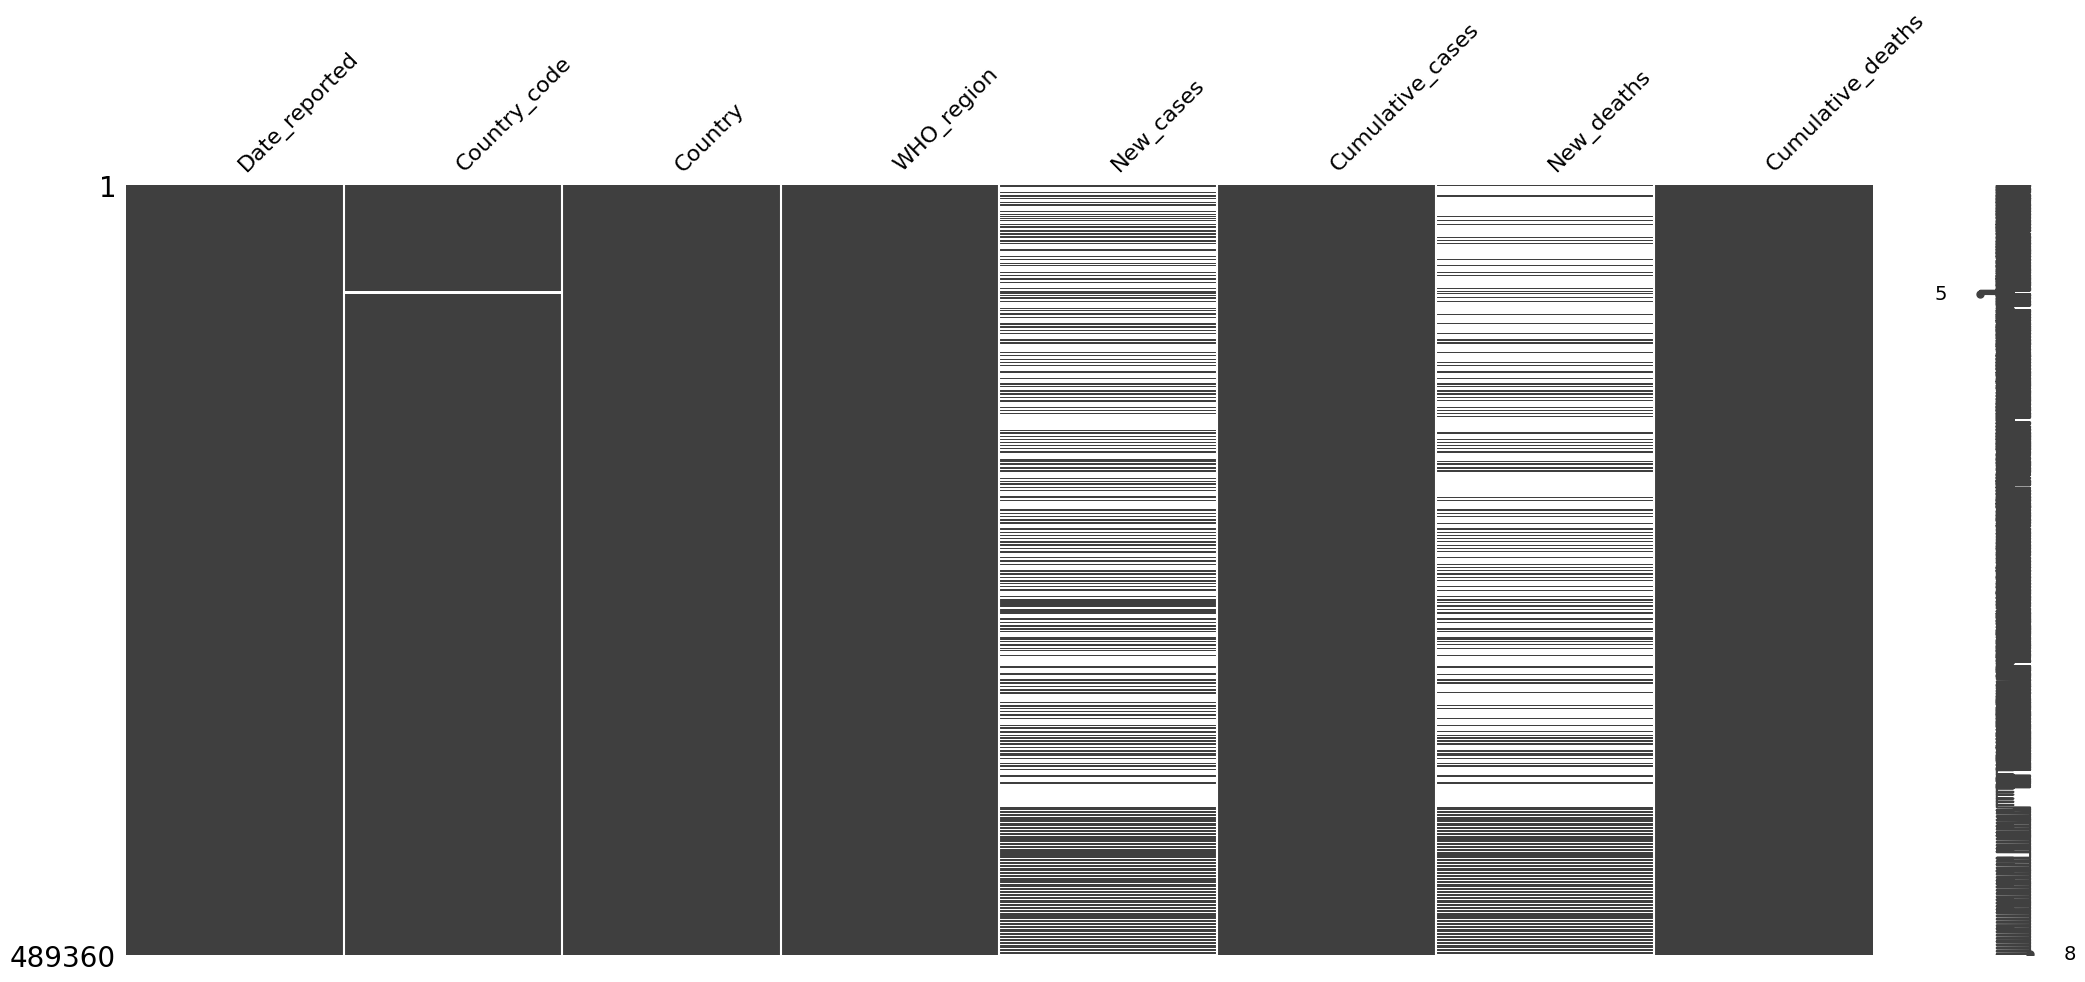

In [ ]:
import missingno as msno
msno.matrix(df)

## Handling Missing Values

In [ ]:
df["Country_code"] = df["Country_code"].fillna("NA")

In [ ]:
both_na = df[df['New_cases'].isna() & df['New_deaths'].isna()].groupby('Country').size()
total_rows = df.groupby('Country').size()
na_summary = pd.DataFrame({
    "Total_Country_rows": total_rows,
    "Missing_cases_deaths_rows": both_na
}).fillna(0)
na_summary["Not_Missing_rows"] = na_summary["Total_Country_rows"] - na_summary["Missing_cases_deaths_rows"]
na_summary["Missing_percentage"] = (na_summary["Missing_cases_deaths_rows"] / na_summary["Total_Country_rows"]) * 100
na_summary = na_summary.sort_values("Missing_percentage", ascending=False)
display(na_summary.head(15))
countries_to_drop = na_summary[na_summary["Missing_percentage"] > 95].index
print("number of countries before drop:", df['Country'].nunique())
df = df[~df['Country'].isin(countries_to_drop)]

print("number of countries after drop:", df['Country'].nunique())

,Total_Country_rows,Missing_cases_deaths_rows,Not_Missing_rows,Missing_percentage
Country,,,,
International conveyance (Vanuatu),2039,2038.0,1.0,99.950956
International commercial vessel,2039,2038.0,1.0,99.950956
International conveyance (American Samoa),2039,2037.0,2.0,99.901913
International conveyance (Kiribati),2039,2037.0,2.0,99.901913
International conveyance (Solomon Islands),2039,2036.0,3.0,99.852869
Holy See,2039,2028.0,11.0,99.460520
Turkmenistan,2039,2019.0,20.0,99.019127
Saint Helena,2039,2010.0,29.0,98.577734
International conveyance (Diamond Princess),2039,2009.0,30.0,98.528691


number of countries before drop: 240
number of countries after drop: 230


In [ ]:
df['New_cases']= df['New_cases'].fillna(0)
df['New_deaths']= df['New_deaths'].fillna(0)

In [ ]:
df.shape

(468970, 8)

In [ ]:
df.isnull().sum()

,0
Date_reported,0
Country_code,0
Country,0
WHO_region,0
New_cases,0
Cumulative_cases,0
New_deaths,0
Cumulative_deaths,0


In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.689700e+05,4.689700e+05,468970.000000,4.689700e+05
mean,1.659956e+03,2.133481e+06,15.138928,2.261792e+04
std,3.257619e+04,8.695335e+06,140.548283,8.855807e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,8.867000e+03,0.000000,6.700000e+01
50%,0.000000e+00,6.890400e+04,0.000000,8.460000e+02
75%,3.400000e+01,6.969210e+05,0.000000,8.703000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.226130e+06


In [ ]:
df.Date_reported = pd.to_datetime(df.Date_reported)

In [ ]:
df.dtypes

,0
Date_reported,datetime64[ns]
Country_code,object
Country,object
WHO_region,object
New_cases,float64
Cumulative_cases,int64
New_deaths,float64
Cumulative_deaths,int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
no_cases = df.groupby('Country')['Cumulative_cases'].max()
no_cases = no_cases[no_cases == 0].index
print("Countries with no cases:", no_cases.tolist())

Countries with no cases: ["Democratic People's Republic of Korea"]


In [ ]:
df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)

,Cumulative_cases
Country,
United States of America,103436829
China,99381761
India,45055912
France,39042805
Germany,38437874
Brazil,37764182
Republic of Korea,34571873
Japan,33803572
Italy,26968605


# ==========  FEATURE ENGINEERING ==========

In [ ]:
df['days_since_first_case'] = (df['Date_reported'] - df.groupby('Country')['Date_reported'].transform('min')).dt.days

In [ ]:
df['year'] = df['Date_reported'].dt.year

In [ ]:
bins=[0,1000,10000,100000,df['Cumulative_cases'].max()]
df['Cumulative_cases_bins'] = pd.cut(df['Cumulative_cases'], bins=bins, labels=['low', 'medium', 'high', 'very high'], include_lowest=True)


In [ ]:
df.head()  # Display the first few rows of the DataFrame with new column

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,days_since_first_case,year,Cumulative_cases_bins
0,2020-01-04,DZ,Algeria,AFR,0.0,0,0.0,0,0,2020,low
1,2020-01-05,DZ,Algeria,AFR,0.0,0,0.0,0,1,2020,low
2,2020-01-06,DZ,Algeria,AFR,0.0,0,0.0,0,2,2020,low
3,2020-01-07,DZ,Algeria,AFR,0.0,0,0.0,0,3,2020,low
4,2020-01-08,DZ,Algeria,AFR,0.0,0,0.0,0,4,2020,low


# ==========  UNIVARIATE ANALYSIS ==========

In [ ]:
num_cols = ['New_cases', 'New_deaths', 'Cumulative_cases', 'Cumulative_deaths']
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:

def univariate_analysis(df, col):
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



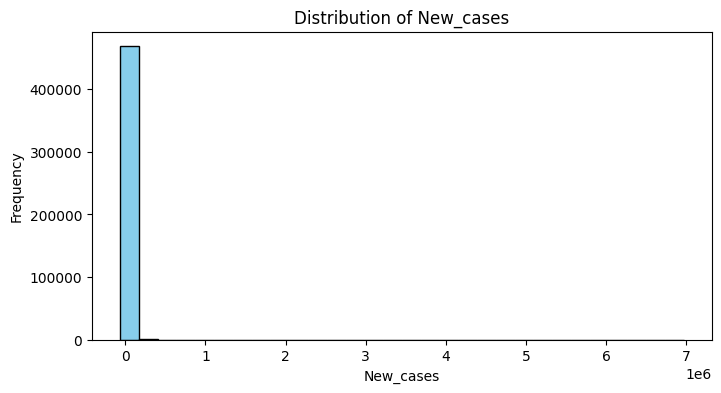

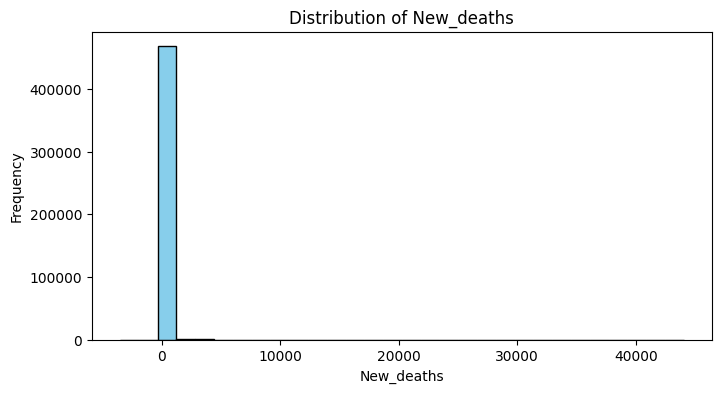

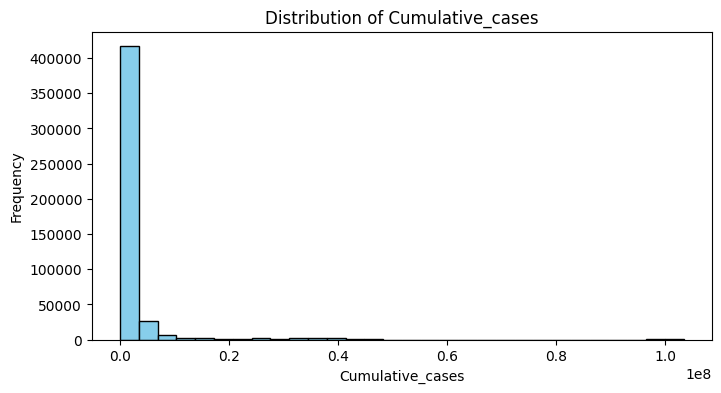

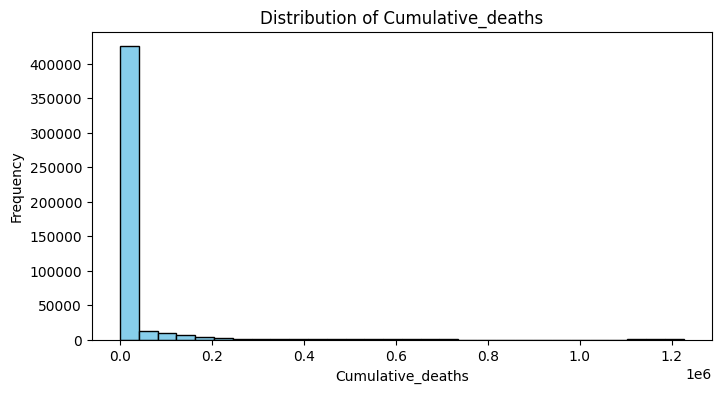

In [ ]:
for col in num_cols:
    univariate_analysis(df, col)

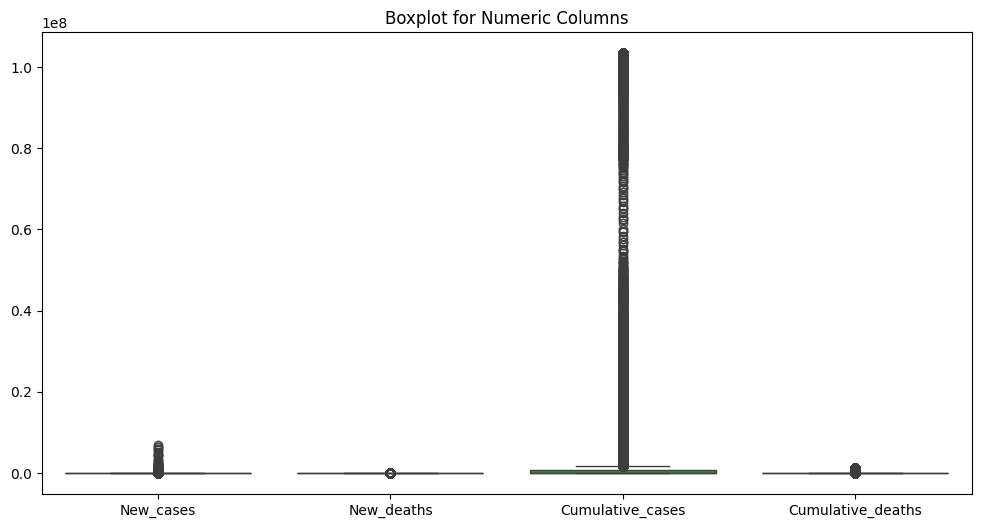

In [ ]:
if len(num_cols) > 0:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[num_cols])
    plt.title('Boxplot for Numeric Columns')
    plt.show()

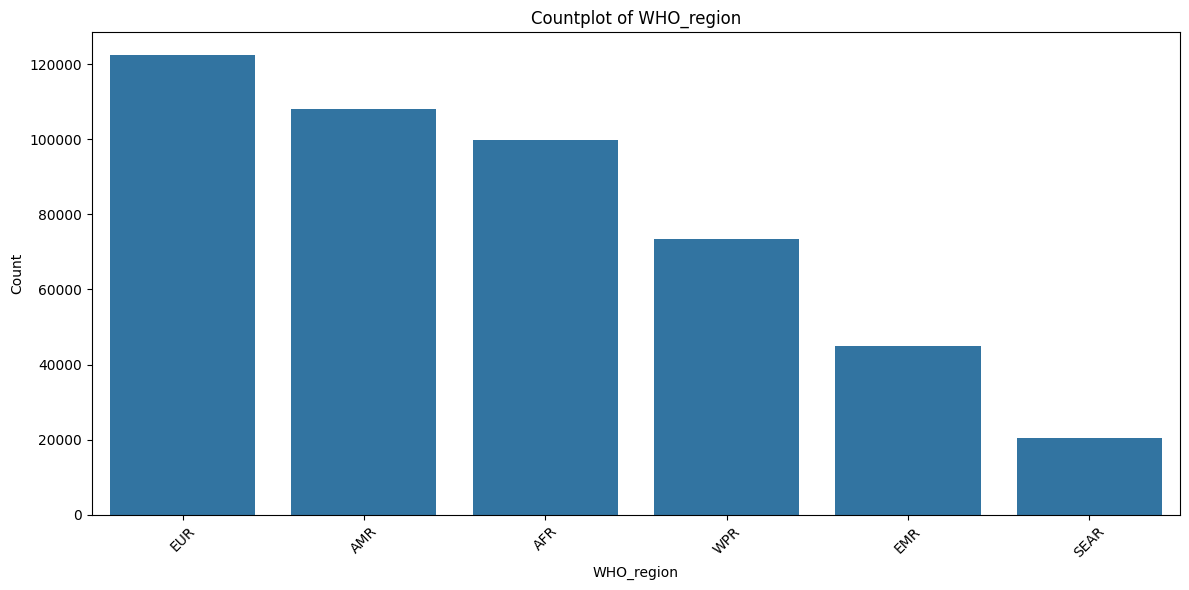

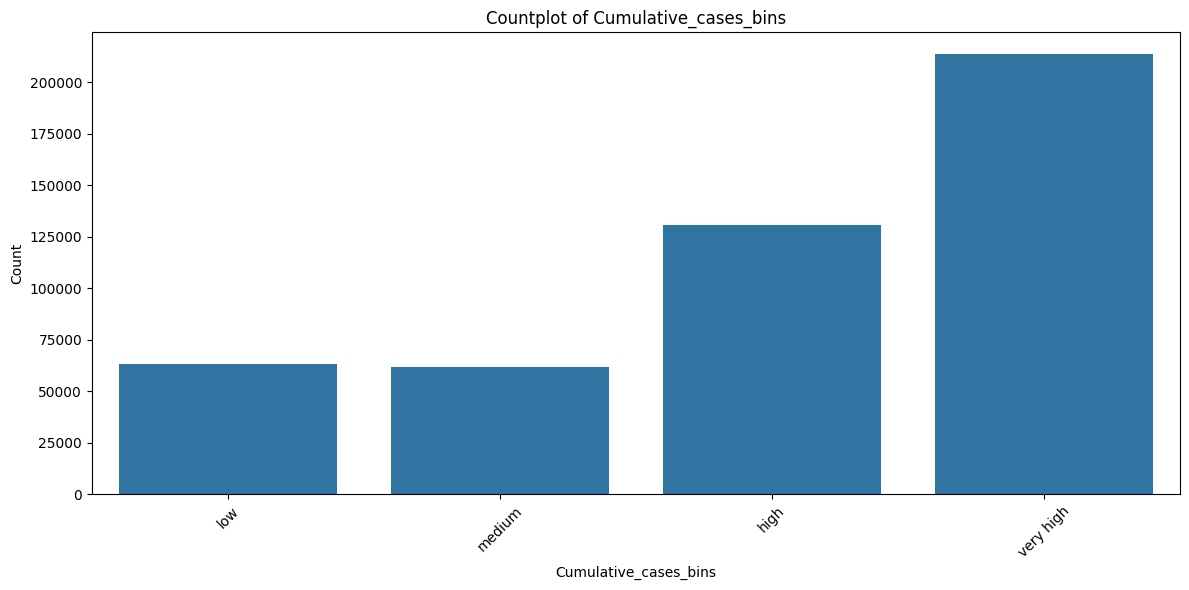

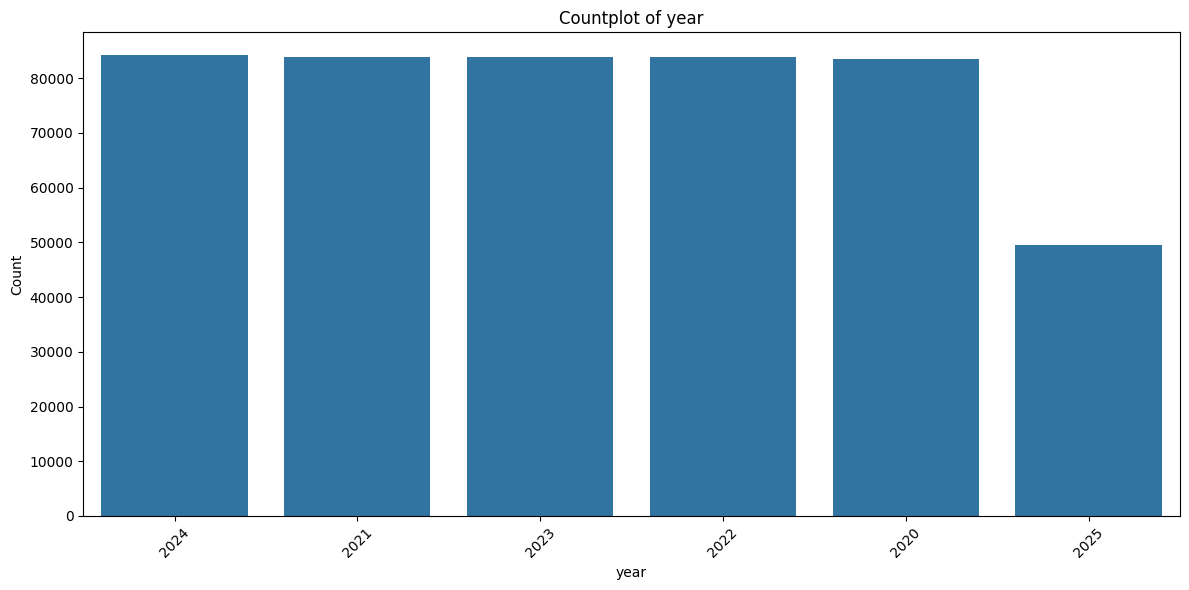

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='WHO_region', order=df['WHO_region'].value_counts().index)
plt.title('Countplot of WHO_region')
plt.xticks(rotation=45)
plt.xlabel('WHO_region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cumulative_cases_bins')
plt.title('Countplot of Cumulative_cases_bins')
plt.xticks(rotation=45)
plt.xlabel('Cumulative_cases_bins')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', order=df['year'].value_counts().index)
plt.title('Countplot of year')
plt.xticks(rotation=45)
plt.xlabel('year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



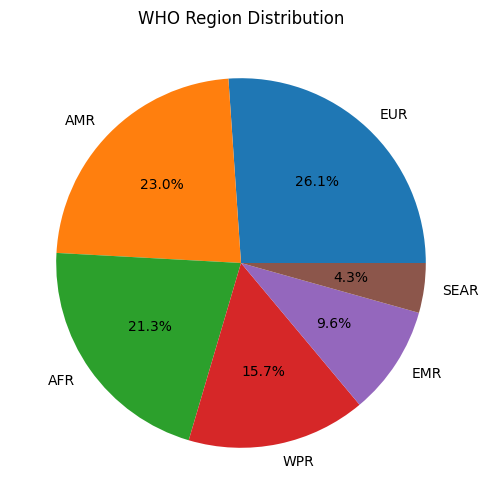

In [ ]:
df['WHO_region'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("WHO Region Distribution")
plt.ylabel("")
plt.show()


# ==========  BIVARIATE ANALYSIS ==========

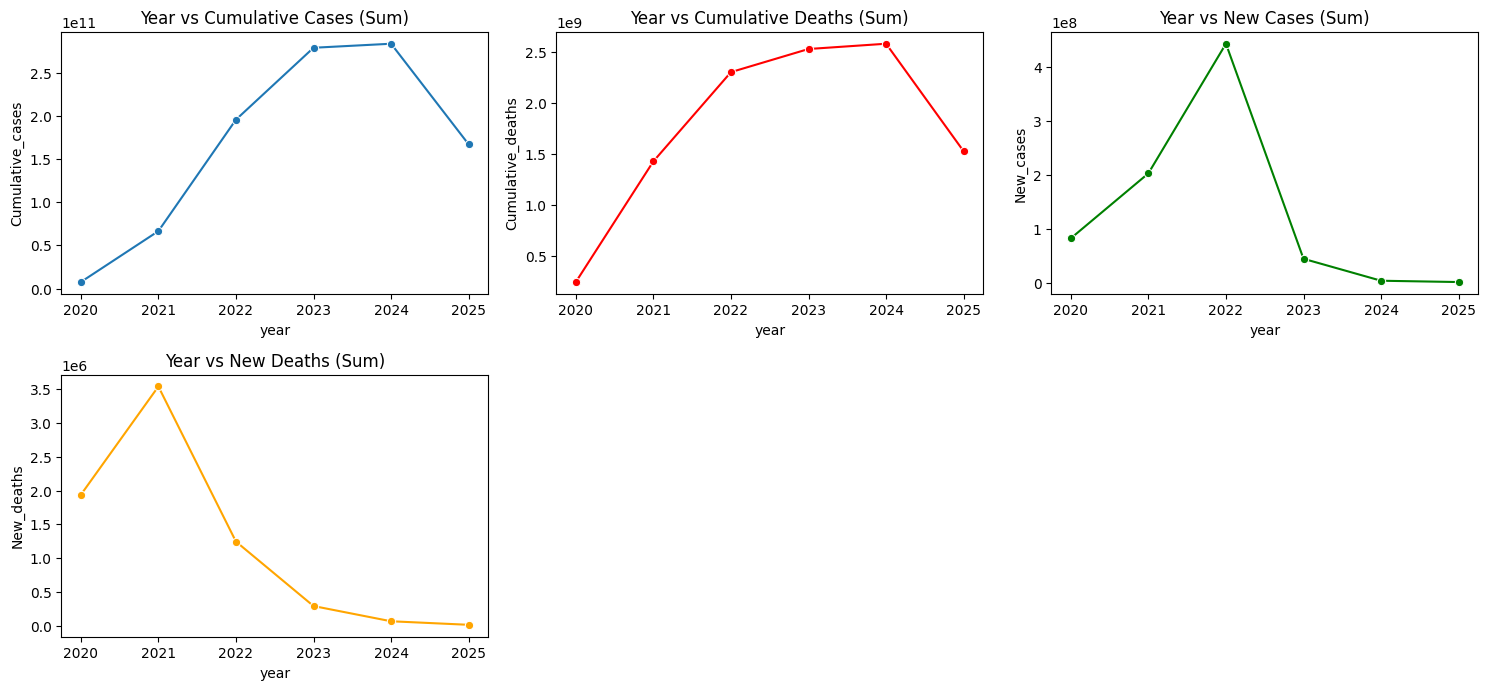

In [ ]:
plt.figure(figsize=(15, 10))

# Line plot for Cumulative_cases
plt.subplot(3, 3, 1)
sns.lineplot(x="year", y="Cumulative_cases", data=df, estimator="sum", errorbar=None, marker="o")
plt.title("Year vs Cumulative Cases (Sum)")

# Line plot for Cumulative_deaths
plt.subplot(3, 3, 2)
sns.lineplot(x="year", y="Cumulative_deaths", data=df, estimator="sum", errorbar=None, marker="o", color="red")
plt.title("Year vs Cumulative Deaths (Sum)")

# line plot for New_cases
plt.subplot(3, 3, 3)
sns.lineplot(x="year", y="New_cases", data=df, estimator="sum", errorbar=None, marker="o", color="green")
plt.title("Year vs New Cases (Sum)")

# line plot for New_deaths
plt.subplot(3, 3, 4)
sns.lineplot(x="year", y="New_deaths", data=df, estimator="sum", errorbar=None, marker="o", color="orange")
plt.title("Year vs New Deaths (Sum)")

plt.tight_layout()
plt.show()

In [ ]:
def feature_vs_target_scatter(df, feature, target):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y=target, data=df)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

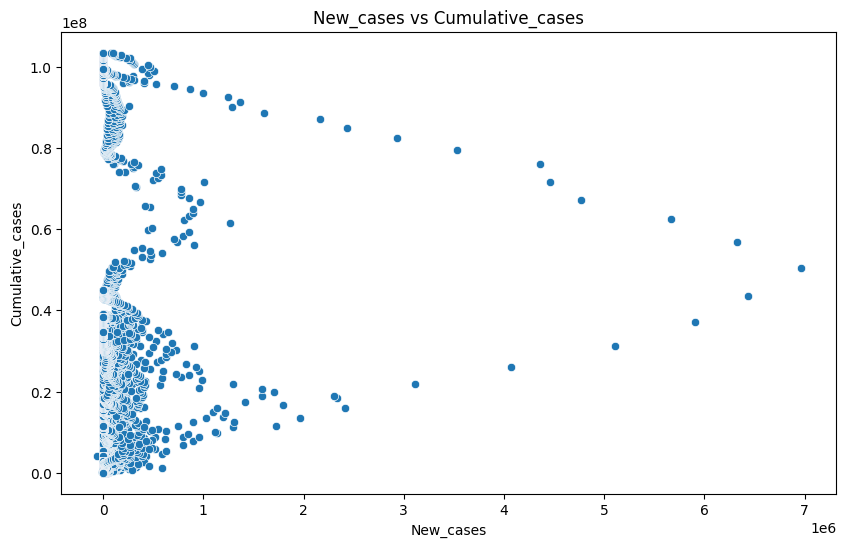

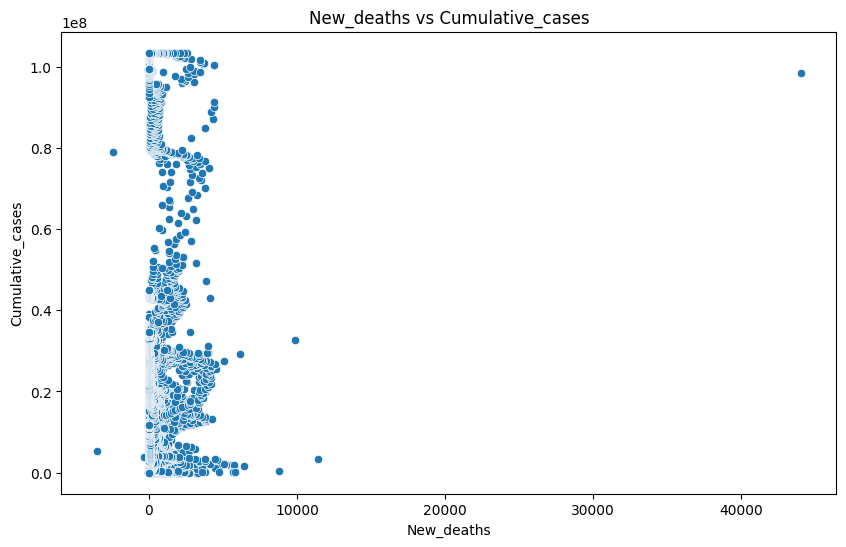

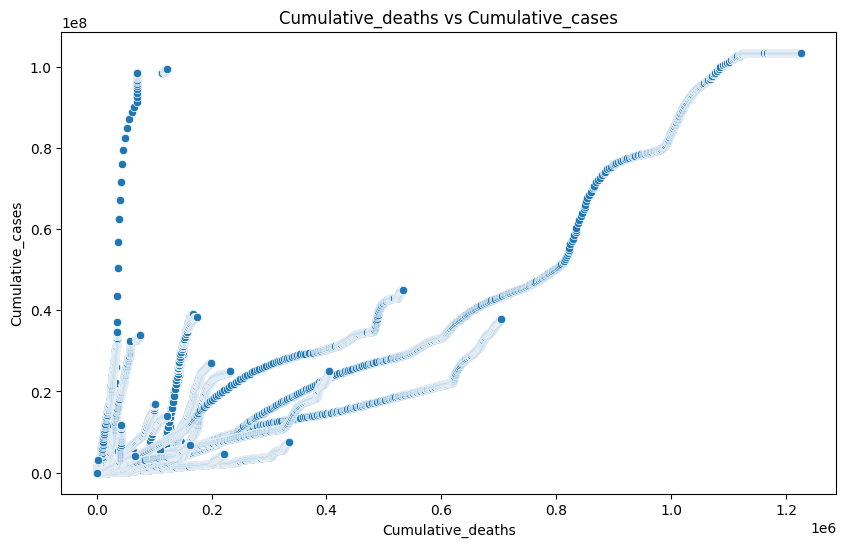

In [ ]:
target='Cumulative_cases'
for col in num_cols:
    if col != target:
      feature_vs_target_scatter(df, col, target)

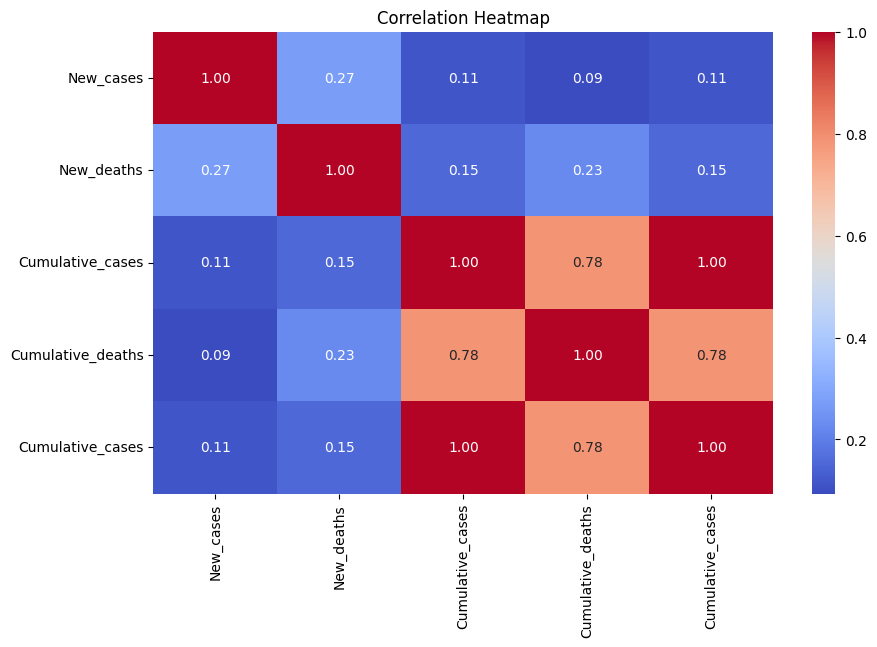

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Cumulative_cases']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


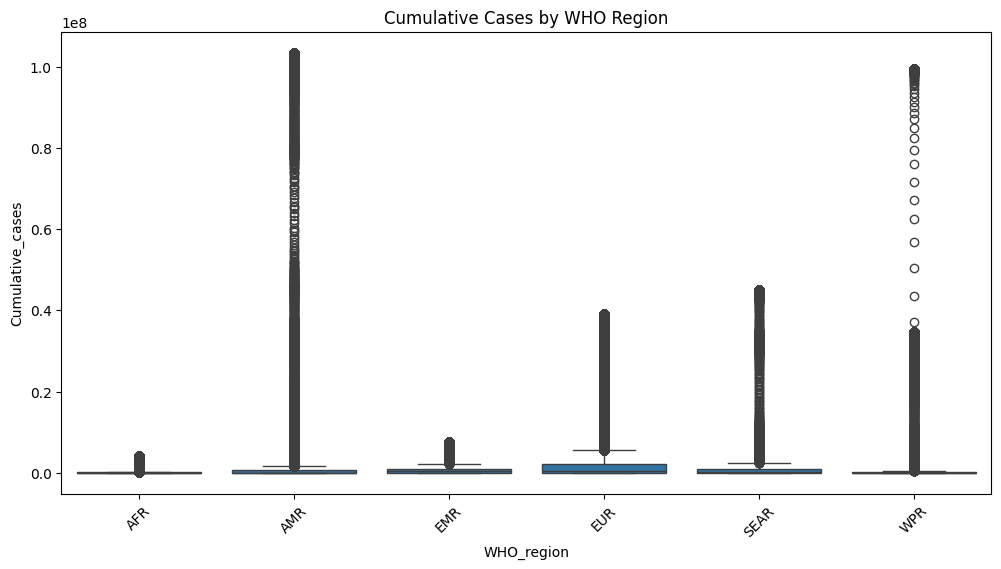

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="WHO_region", y="Cumulative_cases", data=df)
plt.xticks(rotation=45)
plt.title("Cumulative Cases by WHO Region")
plt.show()


# ==========  MULTIVARIATE ANALYSIS ==========

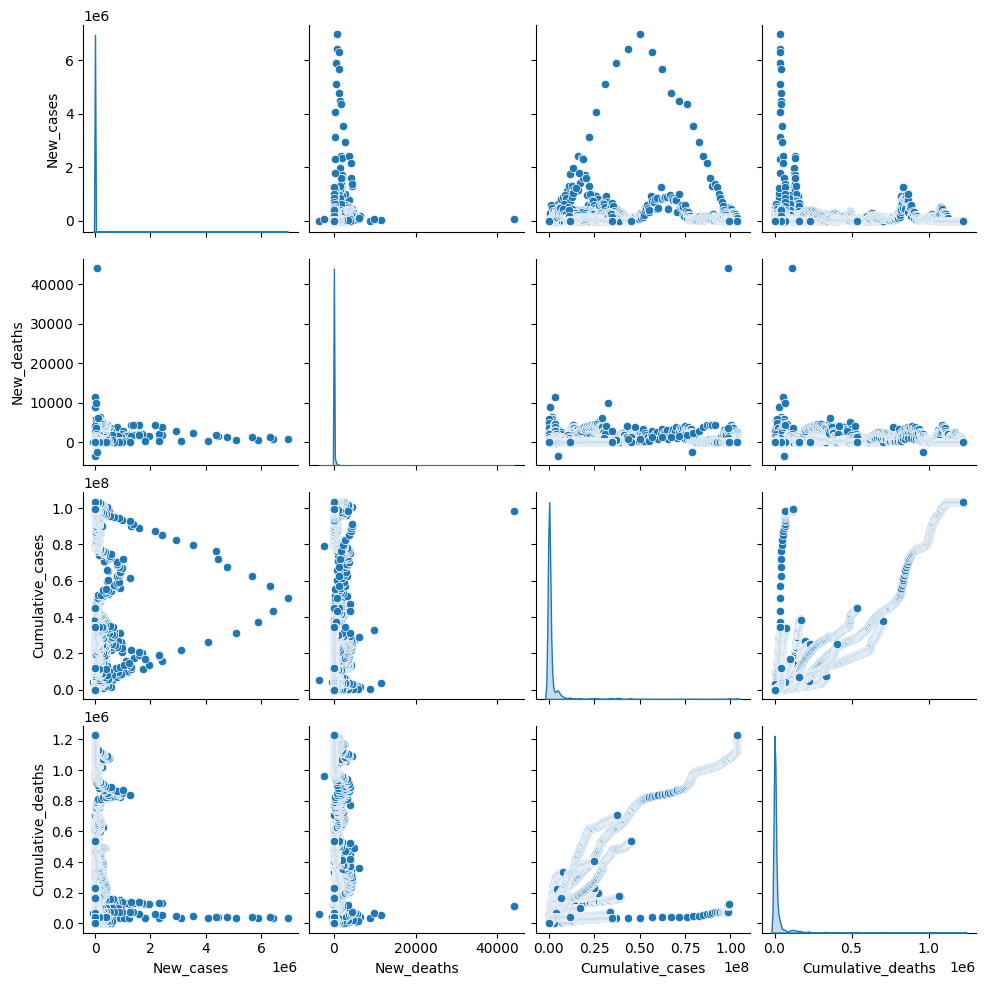

In [ ]:
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()

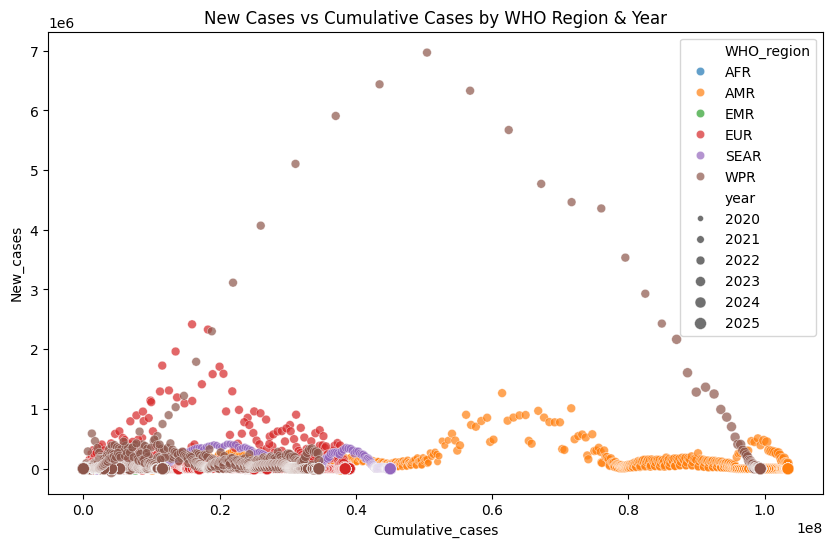

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Cumulative_cases", y="New_cases", hue="WHO_region", size="year", data=df, alpha=0.7)
plt.title("New Cases vs Cumulative Cases by WHO Region & Year")
plt.show()

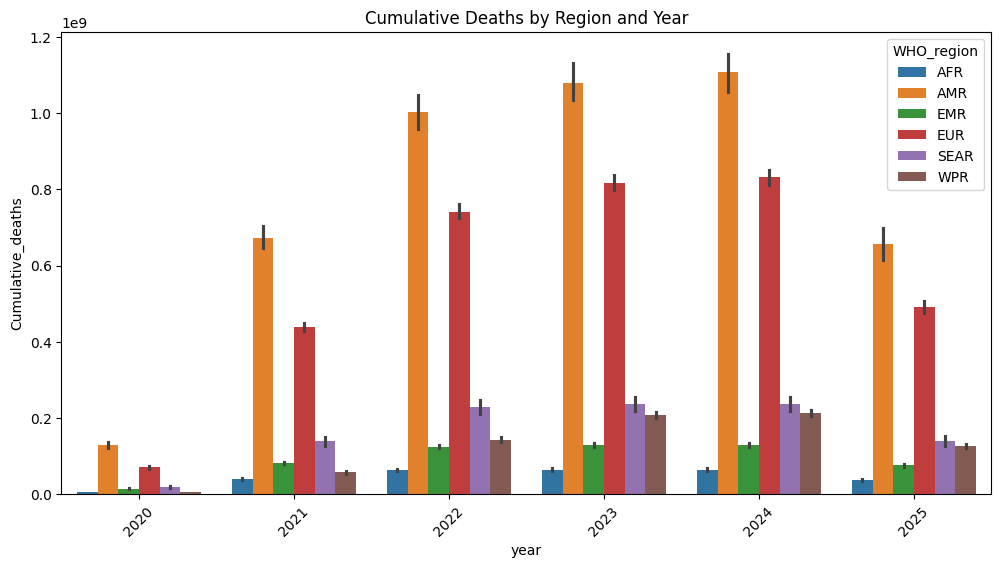

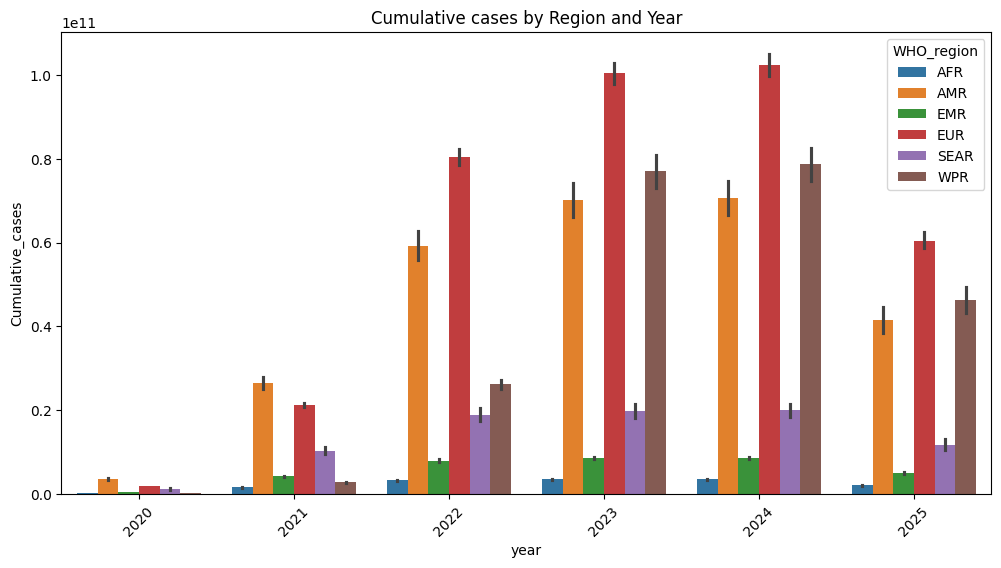

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="year", y="Cumulative_deaths", hue="WHO_region", data=df, estimator=sum)
plt.title("Cumulative Deaths by Region and Year")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12,6))
sns.barplot(x="year", y="Cumulative_cases", hue="WHO_region", data=df, estimator=sum)
plt.title("Cumulative cases by Region and Year")
plt.xticks(rotation=45)
plt.show()

In [ ]:
agg_df = df.groupby(['WHO_region', 'year'])[['Cumulative_cases', 'Cumulative_deaths']].mean().reset_index()

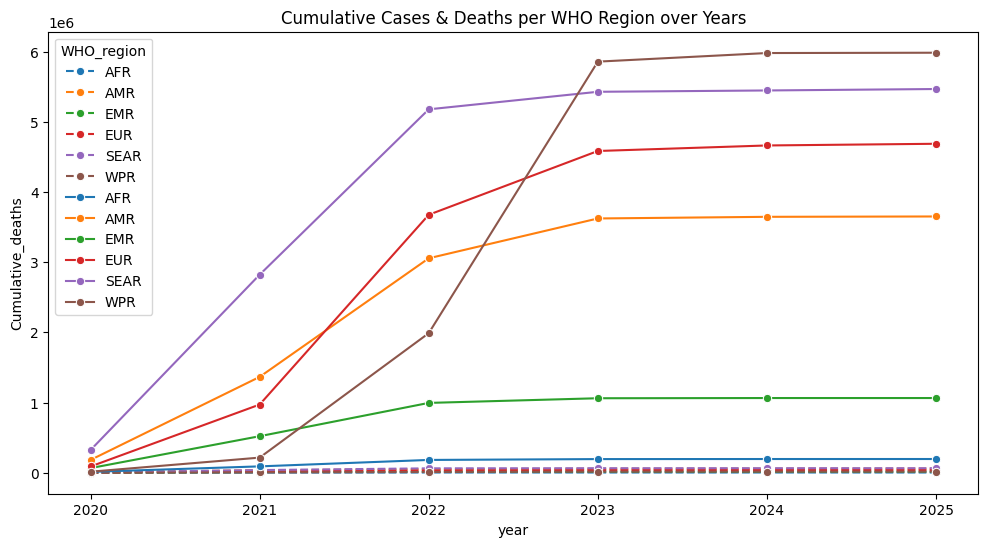

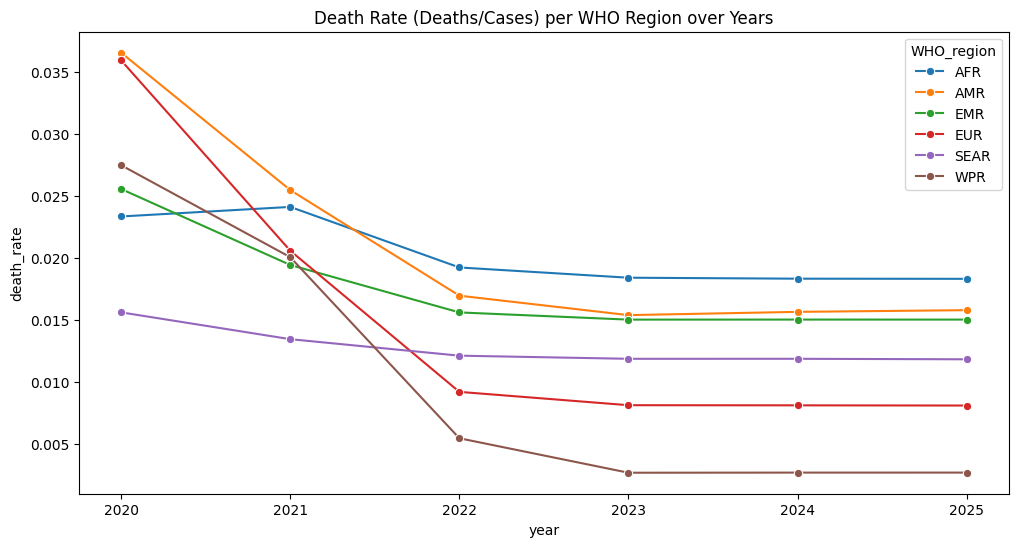

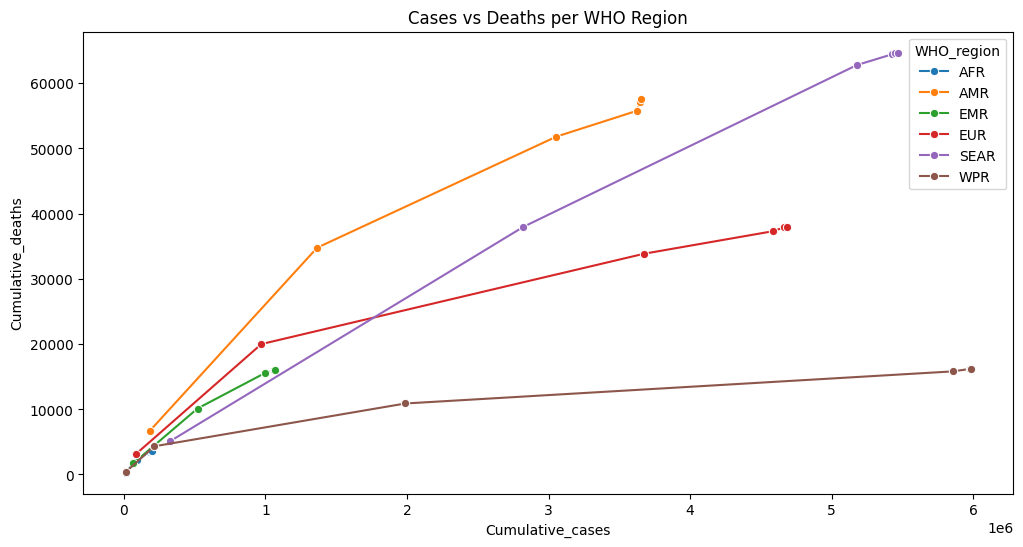

In [ ]:
# Cases vs Deaths over years (per Region)
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="Cumulative_deaths", hue="WHO_region",
             data=agg_df, marker="o", linestyle="--")
sns.lineplot(x="year", y="Cumulative_cases", hue="WHO_region",
             data=agg_df, marker="o")
plt.title("Cumulative Cases & Deaths per WHO Region over Years")
plt.show()


# Ratio: Deaths / Cases per Region
agg_df["death_rate"] = agg_df["Cumulative_deaths"] / agg_df["Cumulative_cases"]

plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="death_rate", hue="WHO_region",
             data=agg_df, marker="o")
plt.title("Death Rate (Deaths/Cases) per WHO Region over Years")
plt.show()

# Region comparison with all in one chart
plt.figure(figsize=(12,6))
sns.lineplot(x="Cumulative_cases", y="Cumulative_deaths",
             hue="WHO_region", data=agg_df, marker="o")
plt.title("Cases vs Deaths per WHO Region")
plt.show()


# plotly in maps

In [ ]:
#pip install pycountry

In [ ]:
import pycountry

# Function to convert ISO-2 to ISO-3
def iso2_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except:
        return None

# Create new column with ISO-3 codes
df["iso_alpha"] = df["Country_code"].apply(iso2_to_iso3)

In [ ]:
import plotly.express as px

# Choropleth for Cumulative Cases
fig = px.choropleth(
    df,
    locations="iso_alpha",        # ISO-3 country code
    color="Cumulative_cases",        # value to color
    hover_name="Country",            # show country name on hover
    projection="natural earth",
    title="Cumulative COVID-19 Cases by Country",
    locationmode="ISO-3"
)
#fig.show()

# ==========  FINAL INSIGHTS ==========

## 1. Data Quality & Distributions  
- The dataset shows **highly skewed distributions** for numerical features such as `New_cases` and `Cumulative_cases` → most records have small values, but there are extreme outliers during peak periods.  
- Categorical features like `WHO_region` and `year` are **unevenly distributed** → some regions and years have significantly more records than others.  

---

## 2. Overall Trends (Univariate & Time Analysis)  
- Both **cumulative cases (`Cumulative_cases`) and cumulative deaths (`Cumulative_deaths`)** increased sharply during 2020–2021.  
- **New cases (`New_cases`)** peaked strongly in the early pandemic waves, then showed a **declining trend in 2022–2023** (likely due to vaccination campaigns and containment measures).  
- **New deaths (`New_deaths`)** followed a similar trend to new cases, but at a smaller scale.  

---

## 3. Regional Insights (Categorical Analysis)  
- **Americas and Europe** recorded the highest cumulative cases and deaths.  
- Regions like **Africa and Western Pacific** had relatively lower case counts.  
- The **death-to-case ratio** was noticeably lower in certain regions → potentially reflecting differences in healthcare quality, policies, or population demographics.  

---

## 4. Relationships & Correlations (Bivariate & Multivariate)  
- A **very strong correlation** exists between `Cumulative_cases` and `Cumulative_deaths`.  
- `New_cases` and `New_deaths` are correlated but to a lesser extent → suggesting a **time lag** between infection and fatality reporting.  
- Scatterplots reveal that while higher case counts generally result in higher deaths, the relationship is **not proportional across all regions** → highlighting external factors (e.g., healthcare systems, public health responses).  

---

## 5. Potential Next Steps  
- **Time Series Forecasting**: Model future case trends using `Date_reported` and rolling averages.  
- **Predictive Modeling**: Predict `New_deaths` based on `New_cases` and other features (e.g., region, year).  
- **Clustering Analysis**: Group countries by pandemic impact (low/medium/high burden).  
- **Feature Engineering**: Create ratios (e.g., deaths per million cases, cases per 100k population) to normalize comparisons across regions.  

---

✨ **Conclusion:**  
The analysis highlights **unequal pandemic impacts across regions**, strong relationships between cases and deaths, and clear **temporal patterns** during the pandemic peaks. These insights provide a foundation for predictive modeling, forecasting, and deeper epidemiological studies.  
